# Fashion MNIST

In this notebook we will have a look at the Fashion MNIST dataset, containing 70000 grayscale images of 28X28, each representing one of 10 types of clothing. The purpose of this notebook is to return the item of clothing, given the picture.

This data is a further complication of the MNIST dataset, which is considered very simple, as using only a very limited number of pixels (features), very high accuracies can be achieved. This data, in this regard at least, is more complicated.

We shall import the dataset through Tensorflow, though we do not use neural networks for the task. The data is imported already divided into a training and testing sets, so there is no need for us to do so, but rather only divide the training set itself into a training and validation sets (explained lated). The data is imported as a single dataframe 3D array (an array of 2D arrays each of which is an image, meaning the 2D array is the pixel matrix of the image (each cell is the grayscale value of the corresponding pixel)).<br>
The data can also be found on Kaggle.com at the link: https://www.kaggle.com/zalando-research/fashionmnist

In [2]:
#Relevant imports
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
import time
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The first thing we must do is import the data from the Tensorflow library. As we can see, the data is of a format that is very hard to read: a 3D array.

In [9]:
(X_train_Total, y_train_Total), (X_test_Final, y_test_Final) = fashion_mnist.load_data()

In [11]:
X_train_Total

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

To improve the readability of the data, while also preparing the data for further preprocessing and for the classifiers, we must transform the data to a 2D shpe and make it a dataframe instead of an array. This we can accomplish by using the reshape() function. We know that each picture is 28X28, so, flattened, there will be 28*28 pixens in the array.

In [15]:
X_train_Total = pd.DataFrame(X_train_Total.reshape(60000, 28*28))
X_test_Final = pd.DataFrame(X_test_Final.reshape(10000, 28*28))

As an example, we can plot each image imported to view it. The below code accomplishes this.

<Figure size 432x288 with 0 Axes>

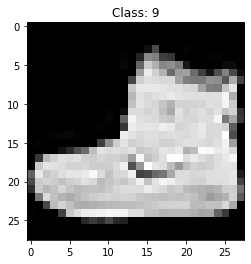

<Figure size 432x288 with 0 Axes>

In [16]:
plt.imshow(X_train_Total[0], cmap = 'gray')
plt.title('Class: {}'.format(y_train_Total[0]))
plt.figure()

In [ ]:
print(X_train.isna().sum().sum()
      + X_test.isna().sum().sum()
      + pd.DataFrame(y_train).isna().sum().sum()
      + pd.DataFrame(y_test).isna().sum().sum())

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_train_Total, y_train_Total,
                                                                test_size = 0.1, random_state = 0)

In [8]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
50234,0,0,0,0,0,1,0,1,0,0,...,0,0,0,151,156,87,0,0,0,0
22686,0,0,0,0,0,0,0,0,0,11,...,0,0,0,0,0,0,0,0,0,0
31748,0,0,0,0,0,0,0,0,0,102,...,204,103,0,0,0,0,0,0,0,0
11359,0,0,0,0,0,0,1,0,0,0,...,2,0,68,147,169,53,0,0,0,0
32533,0,0,0,0,0,0,0,0,0,0,...,4,0,54,184,141,129,126,126,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,0,0,0,0,1,3,0,0,0,0,...,109,108,149,28,0,4,0,0,0,0
52416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42613,0,0,0,0,0,0,0,0,101,60,...,0,0,0,0,0,95,134,143,40,0
43567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,107,49,26,0,0,0,0


In [9]:
z = X_train.values #returns a numpy array
min_max_scaler = MinMaxScaler()
z_scaled = min_max_scaler.fit_transform(z) #fitting and transforming
X_train = pd.DataFrame(z_scaled)

z = X_test.values #returns a numpy array
z_scaled = min_max_scaler.transform(z) #transforming without fitting
X_test = pd.DataFrame(z_scaled)

In [10]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.000000,0.004348,0.000000,0.004525,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.592157,0.611765,0.341176,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.043137,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,...,0.800000,0.403922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.004525,0.000000,0.000000,0.000000,...,0.007843,0.000000,0.266667,0.576471,0.662745,0.207843,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.015686,0.000000,0.211765,0.721569,0.552941,0.505882,0.494118,0.494118,0.235294,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,0.0,0.0,0.0,0.0,0.004464,0.013043,0.000000,0.000000,0.000000,0.000000,...,0.427451,0.423529,0.584314,0.109804,0.000000,0.015686,0.000000,0.000000,0.000000,0.0
53996,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
53997,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.397638,0.235294,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.372549,0.525490,0.560784,0.156863,0.0
53998,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.419608,0.192157,0.101961,0.000000,0.000000,0.000000,0.0


0


In [151]:
pca = PCA(n_components=0.9)
X_train_Reduced = pca.fit_transform(X_train)
X_test_Reduced = pca.transform(X_test)

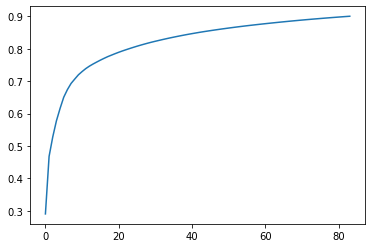

In [152]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)

In [154]:
X_train_Reduced.shape

(60000, 84)

In [157]:
start_timeRandForests = time.time()
modelRandForests = RandomForestClassifier(n_estimators = 500, n_jobs = -1, random_state = 0)
modelRandForests.fit(X_train_Reduced, y_train)
predictionsRandForests = modelRandForests.predict(X_test_Reduced)
accuracyRandForests = metrics.accuracy_score(y_test, predictionsRandForests)
print("Accuracy (Random Forests): ", accuracyRandForests)
timeRandForests = time.time() - start_timeRandForests
print("Time taken to achive result: %s seconds" % (timeRandForests))

Accuracy (Random Forests):  0.8644
Time taken to achive result: 42.34031367301941 seconds


In [158]:
start_timeAdaBoost = time.time()
modelDecTree = DecisionTreeClassifier(random_state=0, max_depth=2)
modelAdaBoost = AdaBoostClassifier(modelDecTree, n_estimators = 1000, random_state = 0, learning_rate = 1)
modelAdaBoost.fit(X_train_Reduced, y_train)
predictionsAdaBoost = modelAdaBoost.predict(X_test_Reduced)
accuracyAdaBoost = metrics.accuracy_score(y_test, predictionsAdaBoost)
print("Accuracy (AdaBoost): ", accuracyAdaBoost)
timeAdaBoost = time.time() - start_timeAdaBoost
print("Time taken to achive result: %s seconds" % (timeAdaBoost))

Accuracy (AdaBoost):  0.6289
Time taken to achive result: 1083.1359899044037 seconds


In [155]:
start_timeXGBoost = time.time()
modelXGBoost = XGBClassifier(learning_rate = 0.2, n_estimators = 200, verbosity = 0, use_label_encoder = False,
                             n_jobs = -1, objective = 'multi:softmax', max_depth = 10)
modelXGBoost.fit(X_train_Reduced, y_train)
predictionsXGBoost = modelXGBoost.predict(X_test_Reduced)
accuracyXGBoost = metrics.accuracy_score(y_test, predictionsXGBoost)
print("Accuracy (XGBoost): ", accuracyXGBoost)
timeXGBoost = time.time() - start_timeXGBoost
print("Time taken to achive result: %s seconds" % (timeXGBoost))

Accuracy (XGBoost):  0.8843
Time taken to achive result: 357.95077538490295 seconds
